***Correlation Heatmap of Air Quality Variables***

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



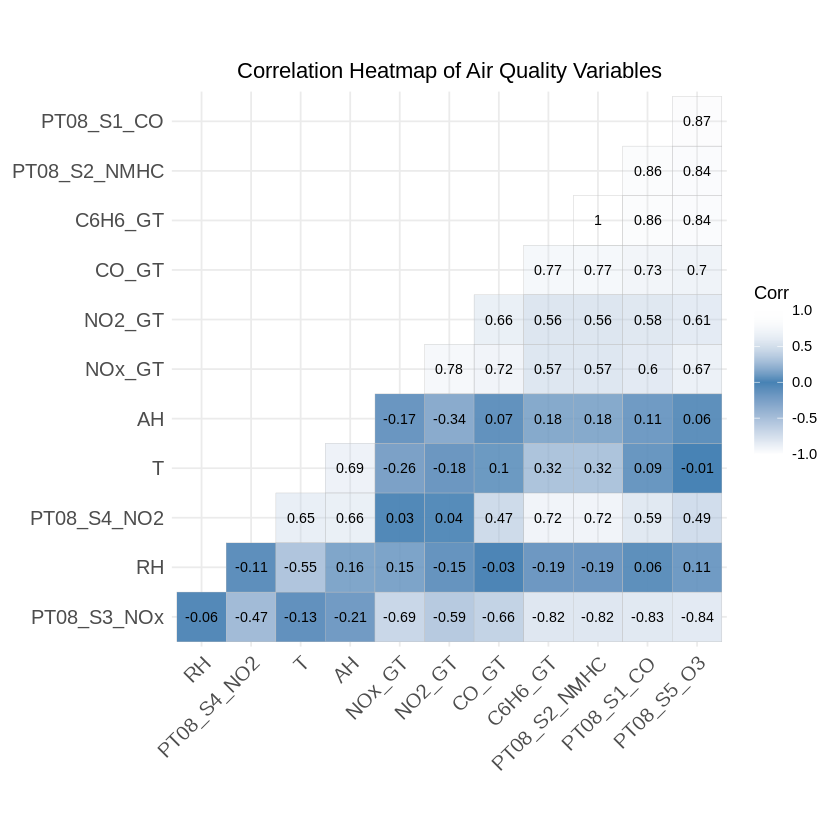

In [ ]:
# Install required packages 
install.packages(c("corrplot", "ggcorrplot"))

# Load the libraries
library(corrplot)
library(ggcorrplot)

# Read the dataset
air_data <- read.csv("/content/AirQualityUCI_No_Outliers_2.csv")

# Exclude only "Date" and "Time" columns
air_data_cleaned <- air_data[ , !(names(air_data) %in% c("Date", "Time"))]

# Keep only numeric columns for correlation
numeric_data <- air_data_cleaned[sapply(air_data_cleaned, is.numeric)]

# Remove rows with missing values
numeric_data <- na.omit(numeric_data)

# Compute Spearman correlation matrix
cor_matrix <- cor(numeric_data, method = "spearman")

# Plot correlation heatmap
ggcorrplot(cor_matrix,
           hc.order = TRUE,         # Use hierarchical clustering
           type = "lower",          # Show lower triangle
           lab = TRUE,              # Show correlation values
           lab_size = 3,
           colors = c("white", "steelblue"),  # Color scheme
           title = "Correlation Heatmap of Air Quality Variables",
           ggtheme = theme_minimal()) +
  theme(plot.title = element_text(hjust = 0.5))  # Center the title


***Distributions of Air Quality & Weather Variables***

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "Skewness values:"
       CO_GT   PT08_S1_CO      C6H6_GT PT08_S2_NMHC       NOx_GT  PT08_S3_NOx 
  0.73941720   0.54973383   0.87940115   0.35226688   1.00368494   0.44523774 
      NO2_GT  PT08_S4_NO2   PT08_S5_O3            T           RH           AH 
  0.42885336  -0.04621337   0.46140514   0.25867581  -0.02093160   0.21108883 


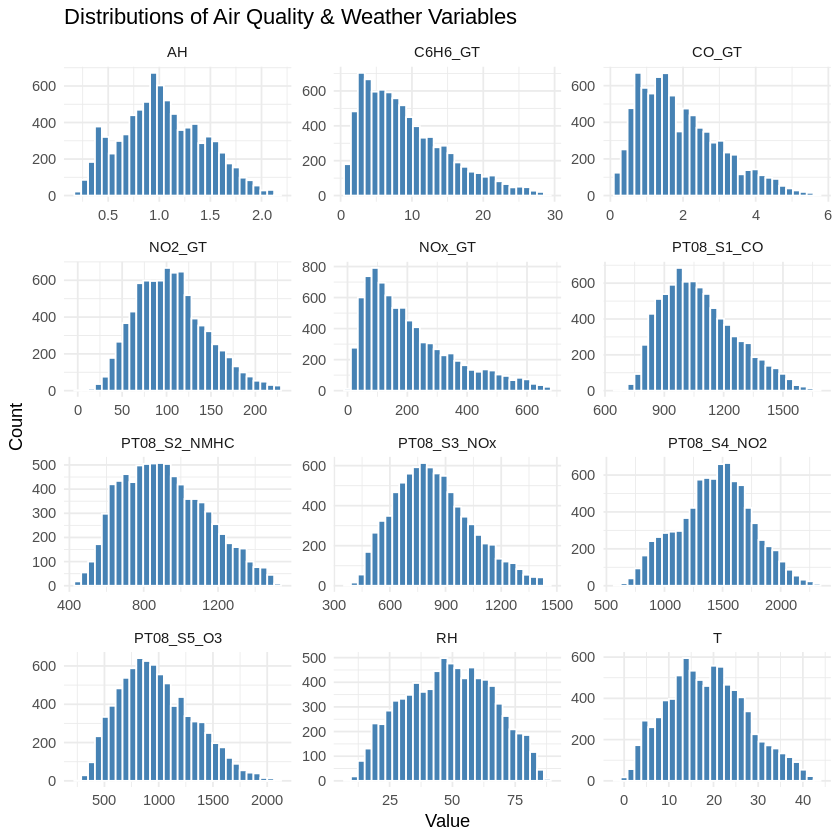

In [3]:
install.packages("e1071")
# Load libraries
library(tidyverse)
library(e1071)

# Load the dataset
air_data <- read.csv("/content/AirQualityUCI_No_Outliers_2.csv")

# List of all variables to include
variables <- c(
  "CO_GT", "PT08_S1_CO", "C6H6_GT", "PT08_S2_NMHC", "NOx_GT", "PT08_S3_NOx",
  "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T", "RH", "AH"
)

# Select relevant data
selected_data <- air_data %>% select(all_of(variables))

# Check skewness
skew_vals <- sapply(selected_data, skewness, na.rm = TRUE)
print("Skewness values:")
print(skew_vals)

# Plot distributions
selected_data %>%
  pivot_longer(cols = everything()) %>%
  ggplot(aes(x = value)) +
  facet_wrap(~name, scales = "free", ncol = 3) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  labs(
    title = "Distributions of Air Quality & Weather Variables",
    x = "Value",
    y = "Count"
  ) +
  theme_minimal()


***Multi-Variable Pair Plot of Pollutants & Weather Features***

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



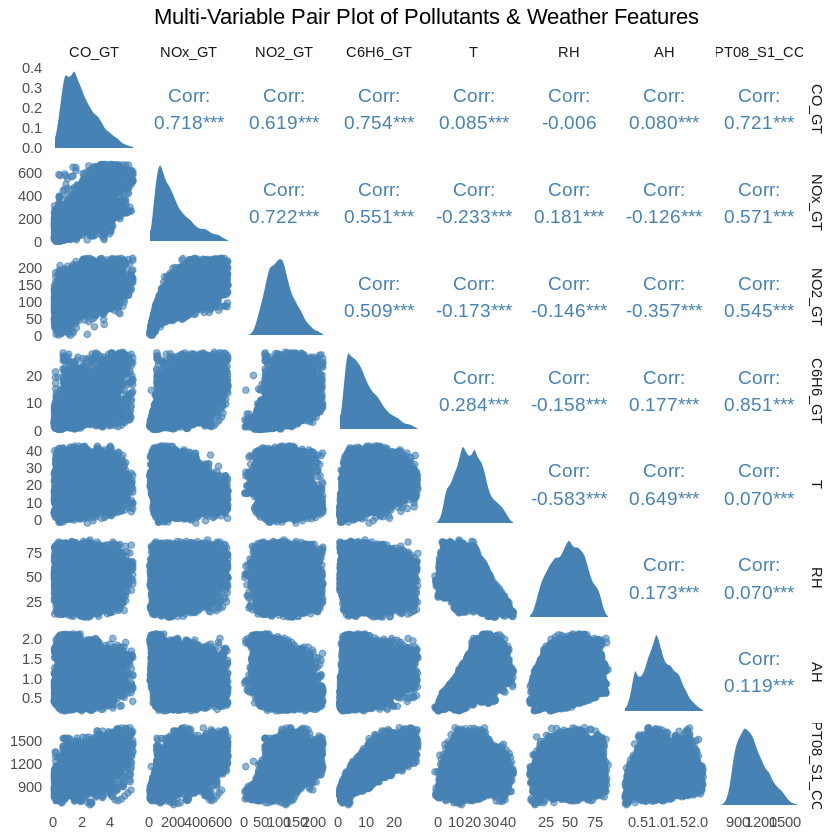

In [4]:
# Install GGally if not already installed
install.packages("GGally")

# Load libraries
library(GGally)
library(tidyverse)

# Load data
air_data <- read.csv("/content/AirQualityUCI_No_Outliers_2.csv")

# Select relevant variables
pollutants <- c("CO_GT", "NOx_GT", "NO2_GT", "C6H6_GT", "T", "RH", "AH","PT08_S1_CO")
pollutant_data <- air_data %>% select(all_of(pollutants))

# Custom theme for consistent appearance
my_theme <- theme_minimal() +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white", color = NA),
        plot.title = element_text(hjust = 0.5))

# Customized ggpairs plot
GGally::ggpairs(
  data = pollutant_data,
  lower = list(
    continuous = wrap("points", alpha = 0.6, color = "steelblue")
  ),
  diag = list(
    continuous = wrap("densityDiag", fill = "steelblue", color = "white")
  ),
  upper = list(
    continuous = wrap("cor", size = 4, color = "steelblue")
  ),
  title = "Multi-Variable Pair Plot of Pollutants & Weather Features"
) + my_theme



***Scatterplot Matrix of Air Quality & Weather Variables***

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



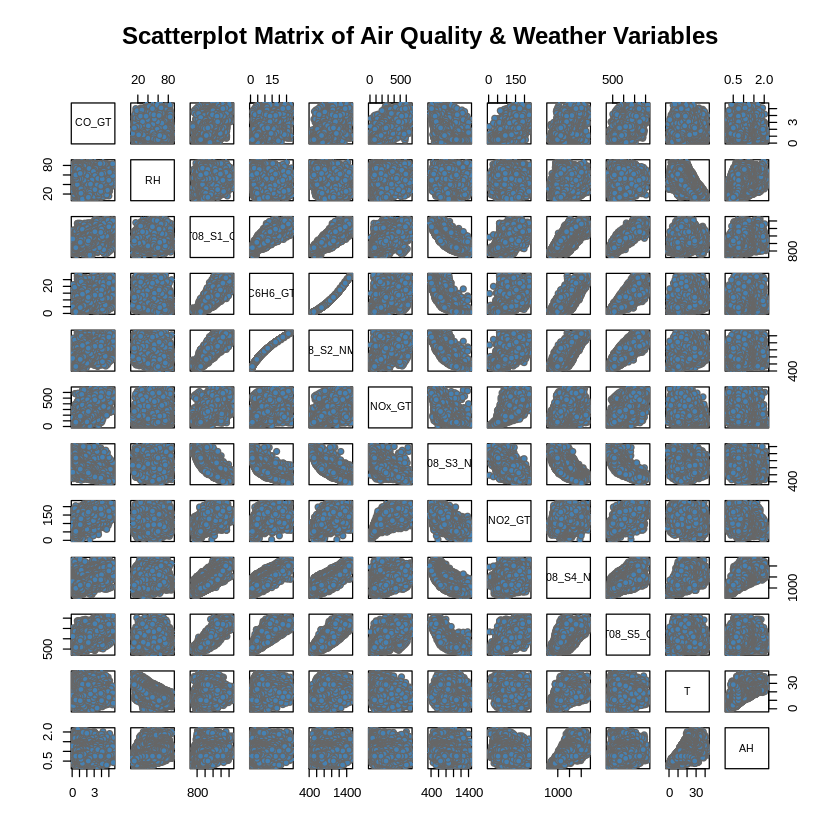

In [ ]:
# Install required packages 
install.packages("GGally")
install.packages("tidyverse")

# Load libraries
library(GGally)
library(tidyverse)

# Load the dataset
air_data <- read.csv("/content/AirQualityUCI_No_Outliers_2.csv")

# Select relevant variables
pollutants <- c("CO_GT", "RH", "PT08_S1_CO", "C6H6_GT", "PT08_S2_NMHC", "NOx_GT",
                "PT08_S3_NOx", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T","AH")
pollutant_data <- air_data %>% select(all_of(pollutants))

# --------------------------------------------
# Option 1: Base R Scatterplot Matrix
# --------------------------------------------
pairs(pollutant_data,
      main = "Scatterplot Matrix of Air Quality & Weather Variables",
      pch = 21,
      bg = "steelblue",
      col = "gray40")


***Temporal Trends***

Warning message:
“ 5155 failed to parse.”


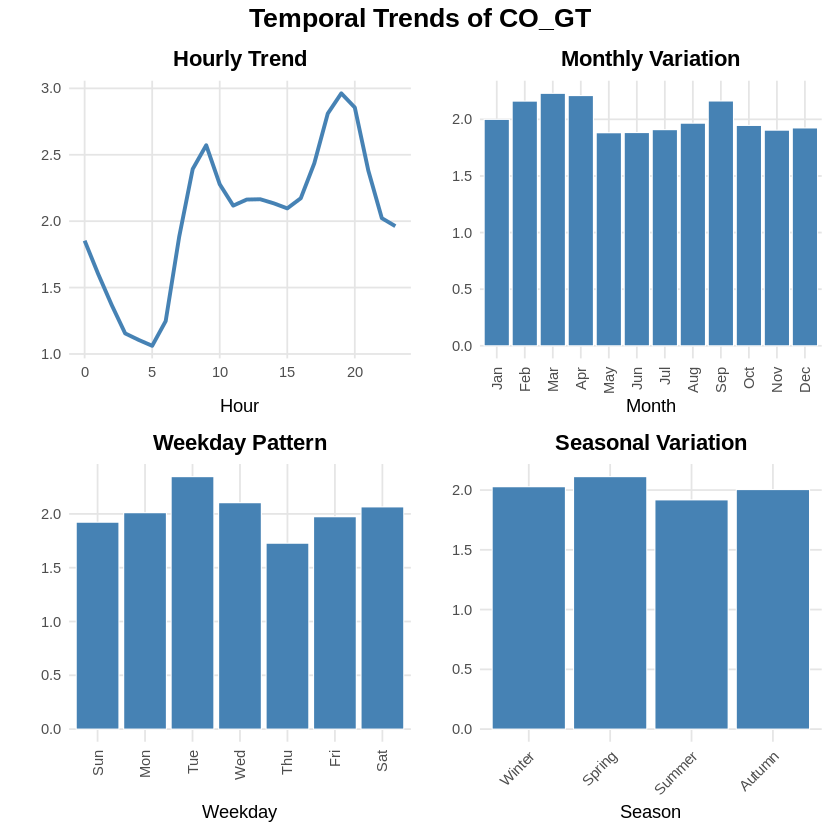

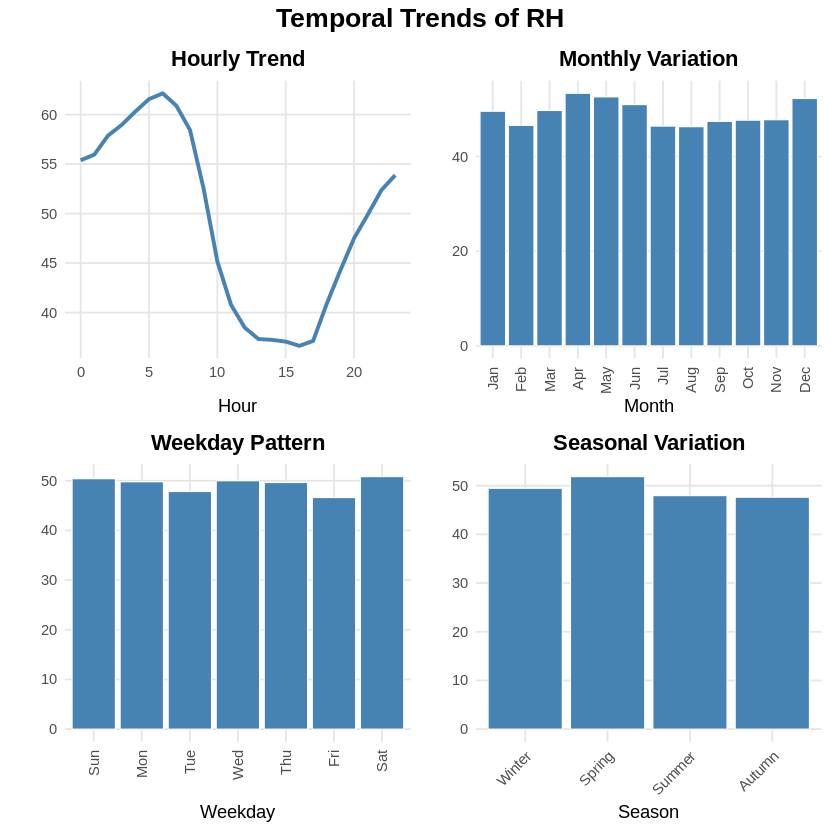

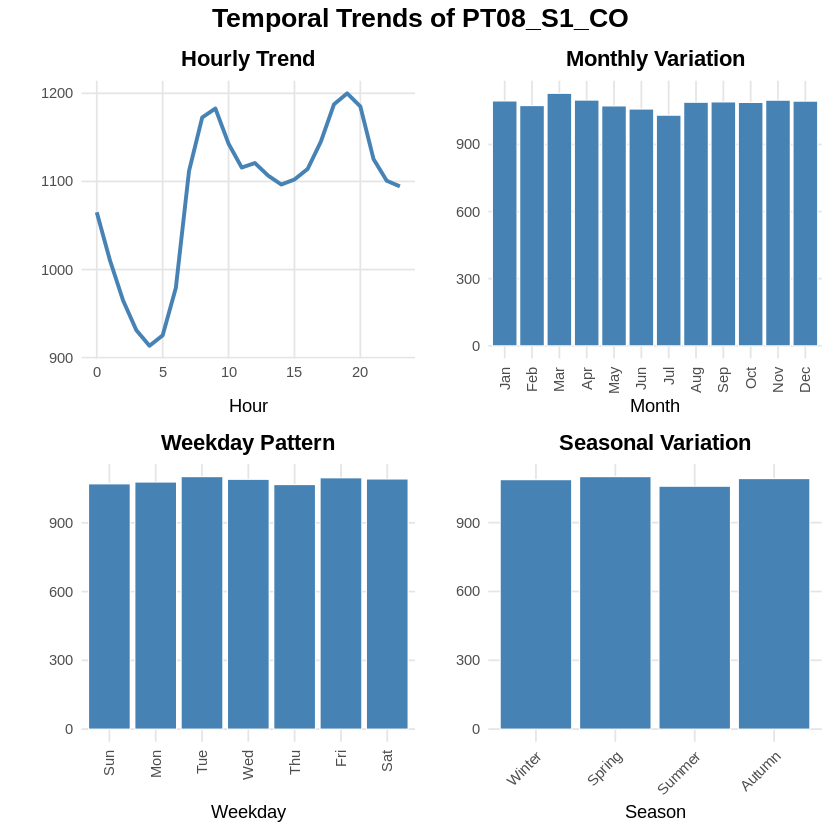

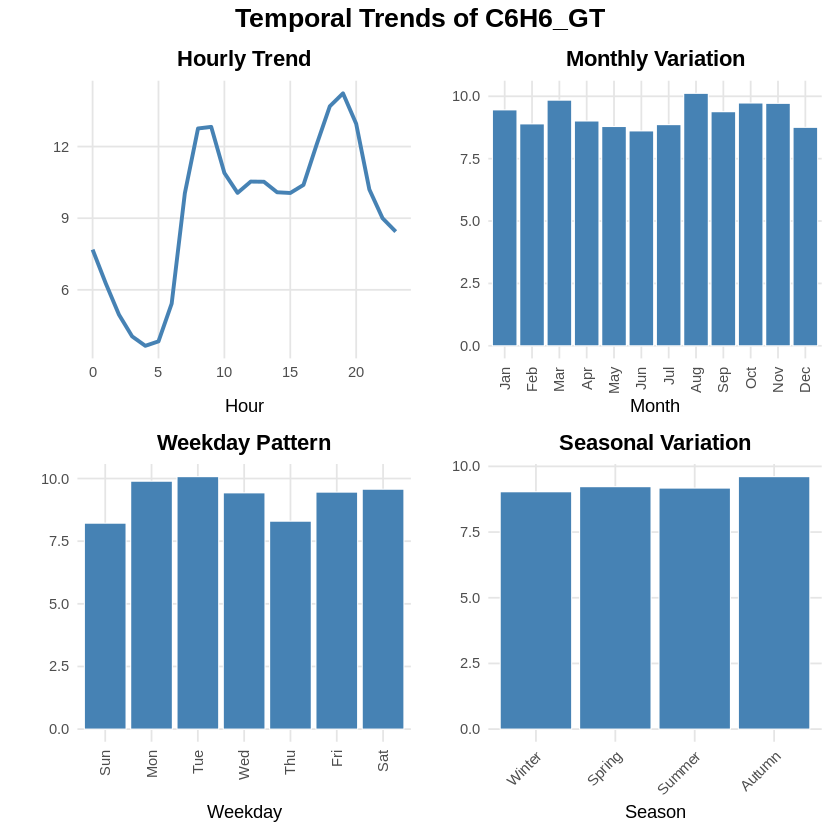

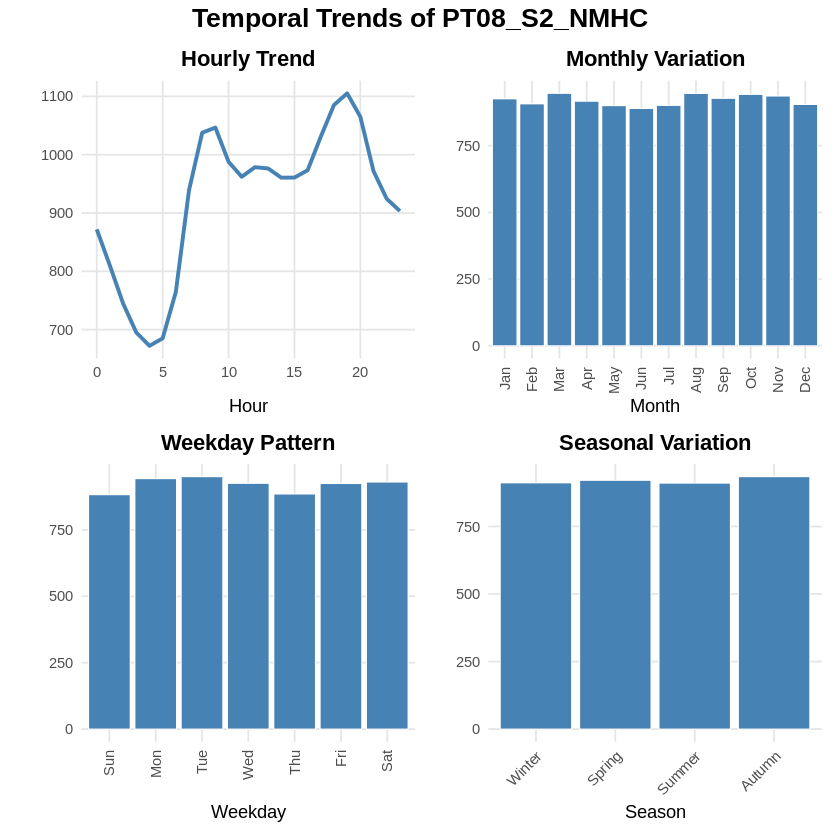

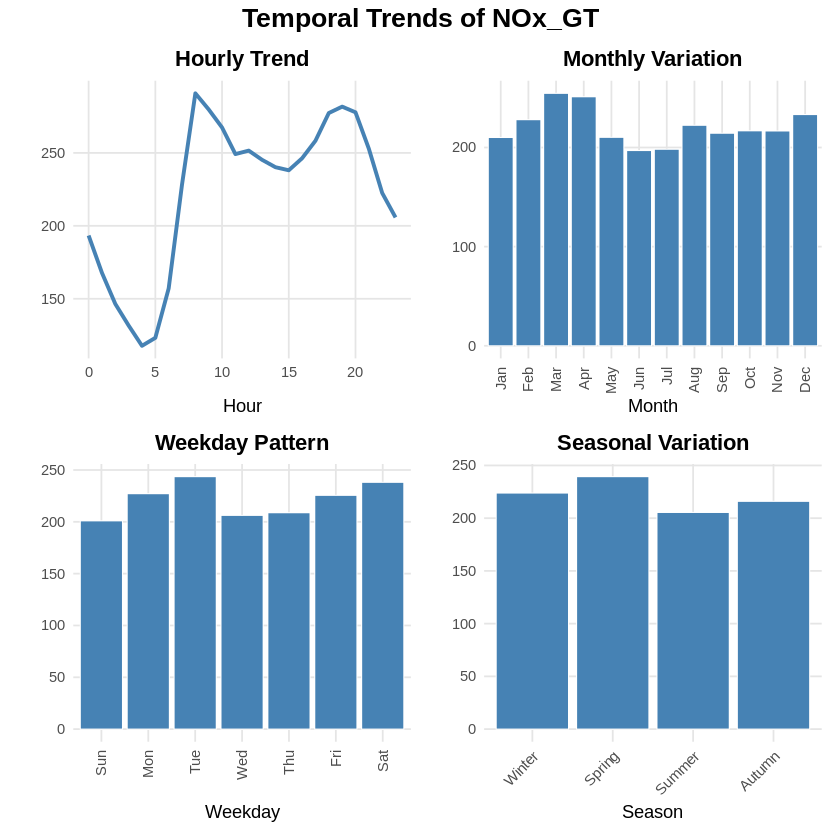

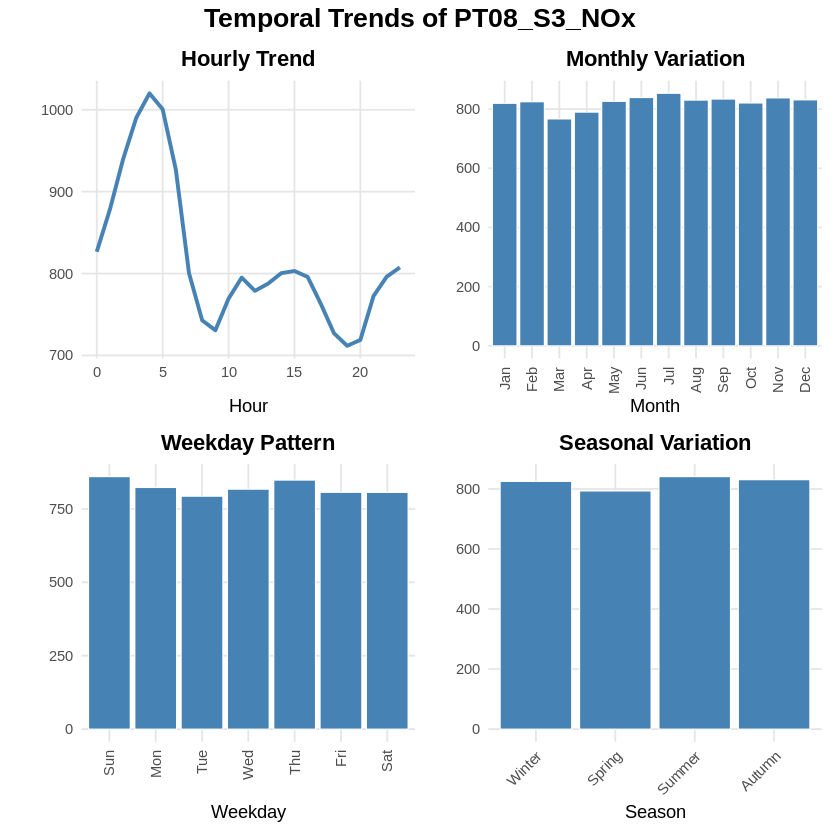

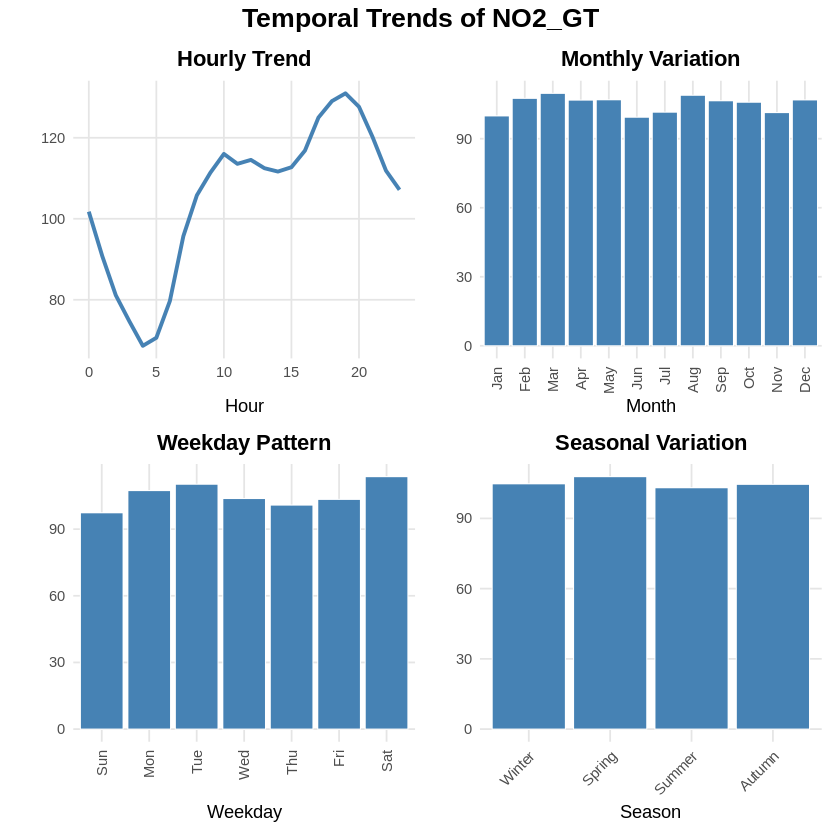

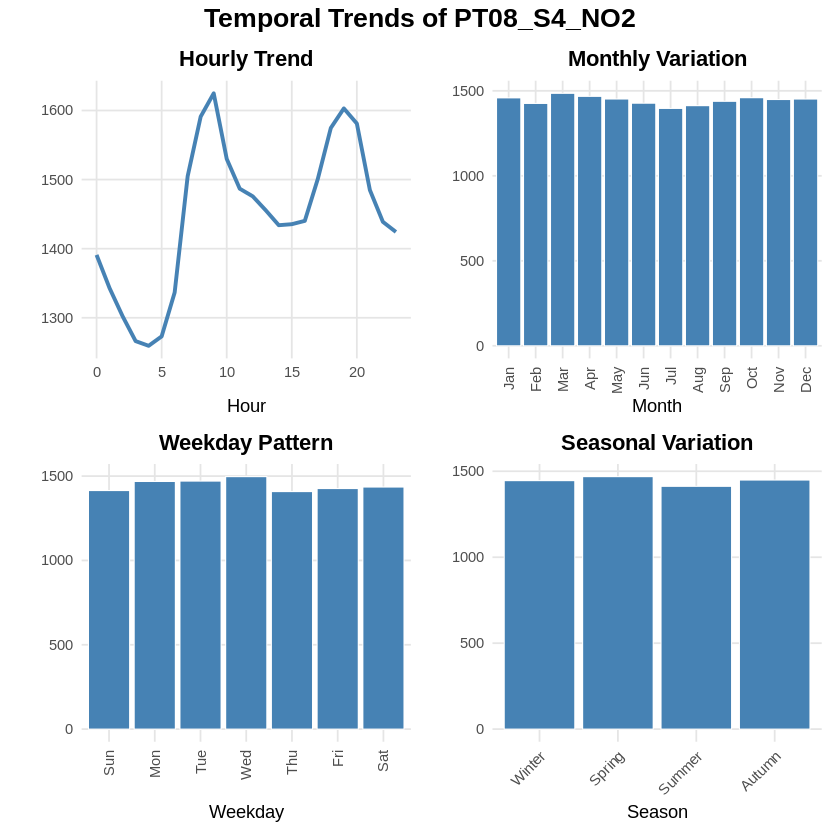

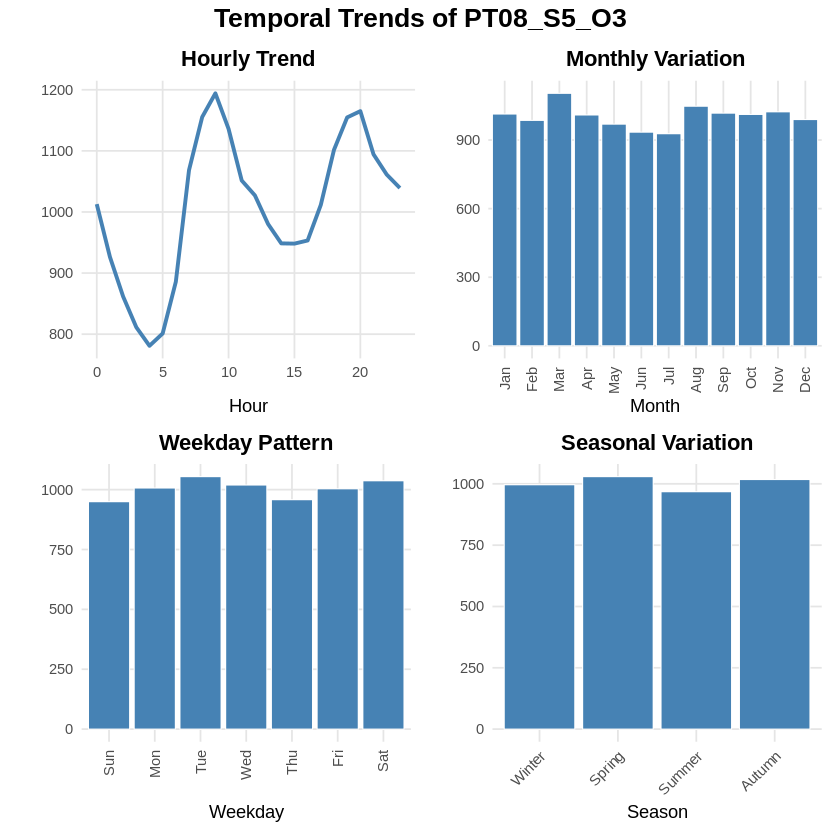

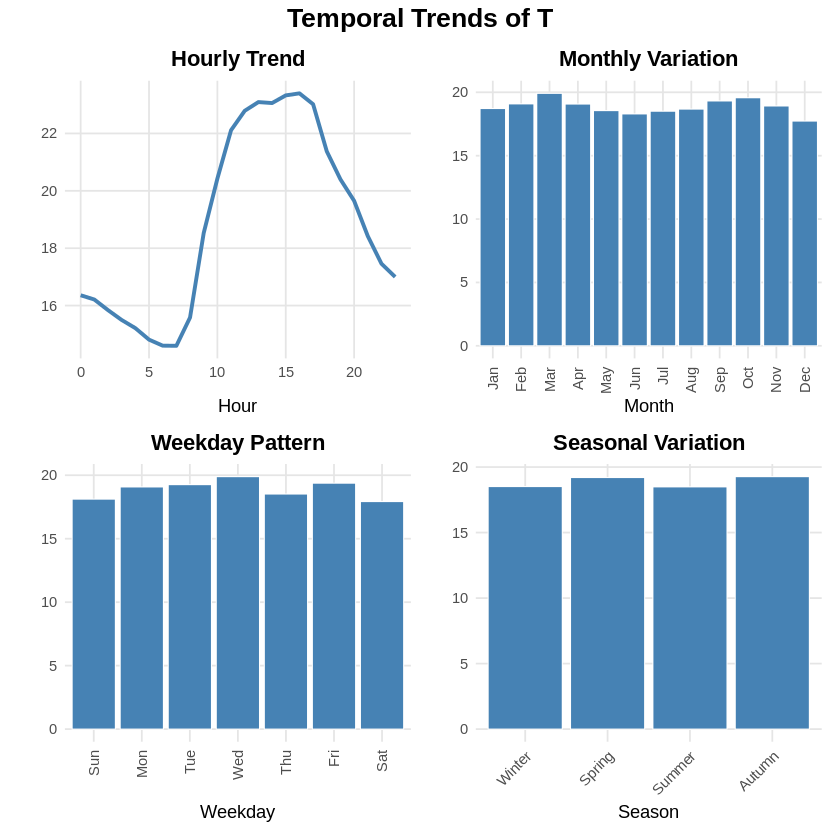

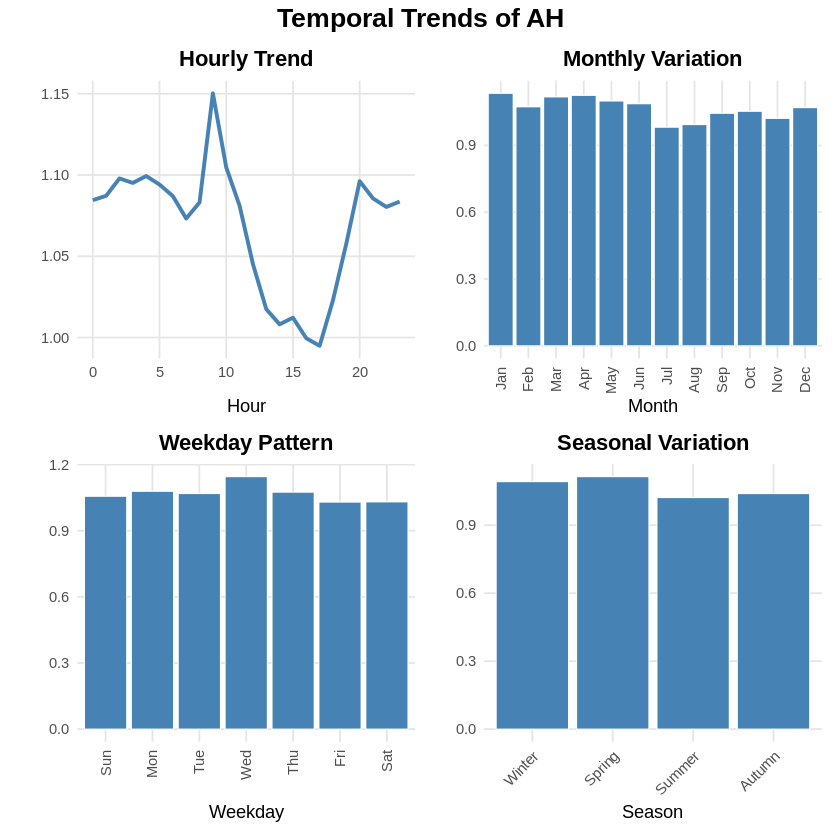

In [6]:
# Load necessary libraries
library(tidyverse)
library(lubridate)
library(patchwork)

# Load dataset
air_data <- read.csv("/content/AirQualityUCI_No_Outliers_2.csv")

# Handle datetime
if ("Date" %in% names(air_data) & "Time" %in% names(air_data)) {
  air_data$Datetime <- parse_date_time(paste(air_data$Date, air_data$Time),
                                       orders = c("dmy HMS", "dmy HM", "ymd HMS", "ymd HM"))
} else if ("Datetime" %in% names(air_data)) {
  air_data$Datetime <- parse_date_time(air_data$Datetime, orders = c("ymd HMS", "dmy HMS", "ymd HM"))
} else {
  stop("No datetime information found.")
}

# Remove rows with missing Datetime
air_data <- air_data %>% filter(!is.na(Datetime))

# Extract time features
air_data <- air_data %>%
  mutate(
    hour = hour(Datetime),
    month = month(Datetime, label = TRUE),
    weekday = wday(Datetime, label = TRUE),
    day = day(Datetime),
    season = factor(case_when(
      month(Datetime) %in% c(12, 1, 2) ~ "Winter",
      month(Datetime) %in% c(3, 4, 5) ~ "Spring",
      month(Datetime) %in% c(6, 7, 8) ~ "Summer",
      month(Datetime) %in% c(9, 10, 11) ~ "Autumn"
    ), levels = c("Winter", "Spring", "Summer", "Autumn"))
  )

# Pollutants to analyze
pollutants <- c("CO_GT", "RH", "PT08_S1_CO", "C6H6_GT", "PT08_S2_NMHC", "NOx_GT",
                "PT08_S3_NOx", "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "T", "AH")

# Custom theme
my_theme <- theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )

# Loop through pollutants and generate side-by-side plots
for (pollutant in pollutants) {

  # Hourly trend
  p1 <- ggplot(air_data, aes(x = hour, y = .data[[pollutant]])) +
    stat_summary(fun = mean, geom = "line", color = "steelblue", linewidth = 1.1) +
    labs(title = "Hourly Trend", x = "Hour", y = "") +
    my_theme

  # Monthly variation
  p2 <- ggplot(air_data, aes(x = month, y = .data[[pollutant]])) +
    stat_summary(fun = mean, geom = "bar", fill = "steelblue", color = "white", linewidth = 0.3) +
    labs(title = "Monthly Variation", x = "Month", y = "") +
    my_theme +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

  # Weekday pattern
  p3 <- ggplot(air_data, aes(x = weekday, y = .data[[pollutant]])) +
    stat_summary(fun = mean, geom = "bar", fill = "steelblue", color = "white", linewidth = 0.3) +
    labs(title = "Weekday Pattern", x = "Weekday", y = "") +
    my_theme +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

  # Seasonal variation
  p4 <- ggplot(air_data, aes(x = season, y = .data[[pollutant]])) +
    stat_summary(fun = mean, geom = "bar", fill = "steelblue", color = "white", linewidth = 0.3) +
    labs(title = "Seasonal Variation", x = "Season", y = "") +
    my_theme +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

  # Combine all four plots
  combined_plot <- (p1 | p2) / (p3 | p4) +
    plot_annotation(title = paste("Temporal Trends of", pollutant),
                    theme = theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16)))

  print(combined_plot)
}
